In [1]:
# Imports, always run this cell
import sklearn.datasets as skdataset
from sklearn.decomposition import PCA
import pandas as pd

# Local imports
from src.model import plotConvexHullDatabases, generateTrainingAndTestingData, generateTrainingAndTestingDataFiltered, \
                      getOrientationConvexHullTargetToModel, getNumericTargetFromDataframe, \
                      generateModelAndPlot, runModelAndGetMetrics

from src.geometry import X_AXIS, Y_AXIS

## Relatório TP1 - Algoritmos 2

Gabriel Pains de Oliveira Cardoso - 2021096887 

Francisco Teixeira Rocha Aragão - 2021031726

---

A seguir, são avaliados 10 datasets utilizando-se as ferramentas desenvolvidas durante o trabalho, são elas:

- **PlotConvexHullDatabases** -> Realiza o plot dos dados selecionados de acordo com a envoltória convexa correspondente a cada uma das classes (target) que representam a database.

- De acordo com o tipo dos dados, são executadas duas diferentes funções:
    - **GenerateTrainingAndTestingData** -> Separa o dataset em dados de treino e teste de maneira aleatória, seguindo a proporção (aproximada) de 70% para treino e 30% para teste.
    
    - **GenerateTrainingAndTestingDataFiltered** -> Igual a função anterior, porém, essa função é utilizada para datasets em que ocorre interseção entre os dados. Dessa forma, os pontos em que ocorrem interseção são retirados, sendo adicionados então no conjunto de testes, para assim ser possível construir a reta do modelo.

- **GenerateModelAndPlot** -> Primeiramente o database é separado de acordo com as suas diferentes classes (targets), sendo construida uma envoltória para uma dessas classes. Posteriormente é verificado se existe intersecção entre as envoltórias através de linear sweeping e verificações de giros e posicionamento entre segmentos. Caso não houver interseção envolvendo pelo menos uma das classes, o modelo é criado, gerando uma reta perpendicular entre a classe que não possui intersecção e as demais.

- **GetOrientationConvexHullTargetToModel** -> Retorna se a envoltória convexa usada como target está acima ou abaixo da reta do modelo. 

- **RunModelAndGetMetrics** -> Classifica os dados de teste de acordo com o modelo encontrado, retornando as métricas para avaliar o resultado da classificação.

----

# Dataset 1: Iris
*Extraído de https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris*

### **Passo 1: Tratamento de dados** 

Carregar o dataset e realizar a projeção em 2 dimensões

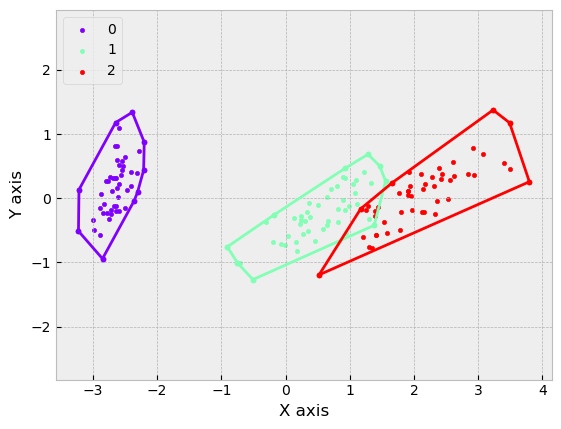

In [2]:
# Dataset test

iris = skdataset.load_iris()

pca = PCA(n_components=2)

pca.fit(iris.data)

iris2D = pca.transform(iris.data)

plotConvexHullDatabases(iris.target, iris2D)

### **Passo 2: Criação do modelo (se separável)** 

O dataset aparenta ser separável para a categoria 0, assim o modelo será construído usando essa categoria como base.

O modelo resultante é binário e classifica os pontos em pertence à categoria 0 ou não pertence.

**Nota:** O modelo será criado usando dados de treinamento, que correspondem a 70% dos dados originais, ao passo que os dados de teste correspondem a 30%.

*A cada vez que essa célula é executada, uma nova amostra aleatória de (aproximadamente) 70/30 é realizada.*

Selected hulls do not intersect, generating model...


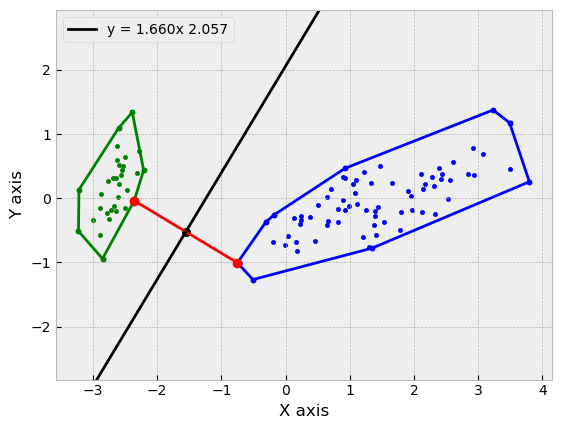

In [3]:
trainingData, trainingDataLabel, testData, testDataLabel = generateTrainingAndTestingData(iris2D, iris.target)

targetToBeSeparated = 0

slope, intercept = generateModelAndPlot(trainingData, trainingDataLabel, targetToBeSeparated)

### **Passo 3: Execução de testes e coleta de métricas**

A partir do modelo resultante (equação da reta). Os dados de teste são usados para avaliar seu desempenho.

In [4]:
# ALWAYS EXECUTE THE PREVIOUS STEPS FOR THIS DATASET BEFORE EXECUTING THIS CELL

direction = getOrientationConvexHullTargetToModel(trainingData, trainingDataLabel, slope, intercept, targetToBeSeparated)

precision, recall, f1 = runModelAndGetMetrics(testData, testDataLabel, targetToBeSeparated, direction, slope, intercept)

print(f"Precision: {precision:1f} %")
print(f"Recall: {recall:1f} %")
print(f"F1-Score: {f1:1f} %")

True Positive: 18 False Positive: 0 True Negative: 27 False Negative: 0

Precision: 100.000000 %
Recall: 100.000000 %
F1-Score: 100.000000 %


### **Passo 4: Análise dos resultados**

De acordo com os resultados obtidos, percebemos que o modelo criado foi capaz de classificar todos os dados corretamente, sem nenhum falso positivo ou falso negativo. Isso ocorreu pois após o PCA, os dados não apresentaram intersecção entre a categoria 0 e as demais, sendo possível traçar uma reta que explicasse a separação entre os valores.

---

# Dataset 2: Wine
*Extraído de https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine*

### **Passo 1: Tratamento de dados** 

Carregar o dataset e realizar a projeção em 2 dimensões

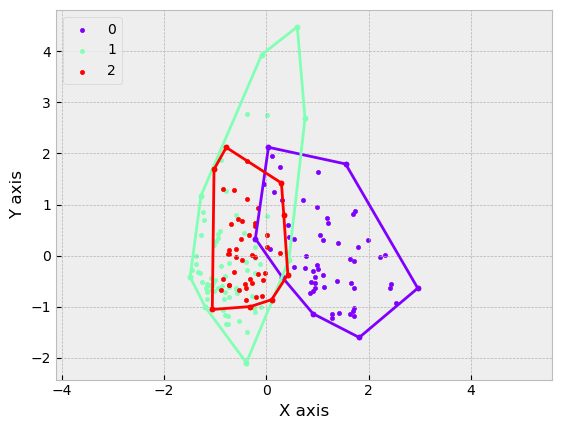

In [5]:
wine = skdataset.load_wine()

X_wine, Y_wine = wine.data, wine.target

pca = PCA(n_components=2, whiten=True)

pca.fit(X_wine)

wine2D = pca.transform(X_wine)

wineTarget = wine.target

plotConvexHullDatabases(wineTarget, wine2D)

### **Passo 2: Filtragem de dados** 

O dataset aparenta ser QUASE separável para a categoria 0, vamos adaptar o dataset para construir uma reta mesmo assim. Isso será feito da seguinte forma:

- Limpar uma seção vertical de pontos, adicionando-se os pontos removidos aos dados de testes.
- Gerar o modelo com o dataset resultante.
- Executar os testes normalmente, os pontos removidos anteriormente serão testados no modelo.

Assim, será gerado um modelo que QUASE separa todos os dados de forma precisa, mas deve apresentar erros devido aos pontos filtrados nesta etapa.

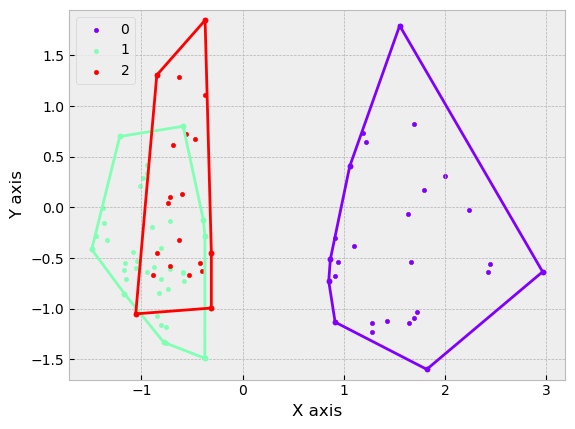

In [6]:
trainingData, trainingDataLabel, testData, testDataLabel = generateTrainingAndTestingDataFiltered(wine2D, wineTarget, X_AXIS, -0.3, 0.8)

plotConvexHullDatabases(trainingDataLabel, trainingData)

### **Passo 3: Criação do modelo (se separável)** 

O dataset agora aparenta ser separável para a categoria 0, assim o modelo será construído usando essa categoria como base.

O modelo resultante é binário e classifica os pontos em pertence à categoria 0 ou não pertence.

**Nota:** O modelo será criado usando dados de treinamento, que correspondem a 70% dos dados originais, ao passo que os dados de teste correspondem a 30%.


Selected hulls do not intersect, generating model...


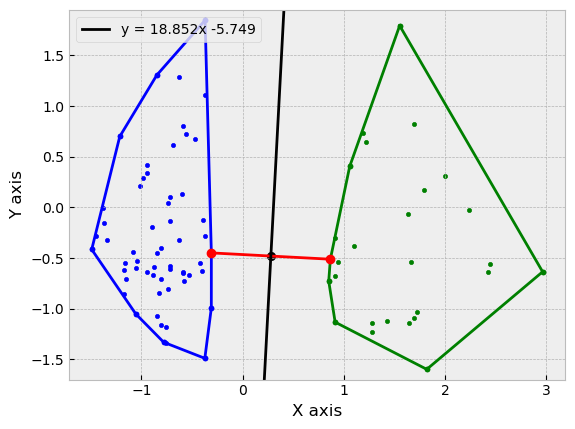

In [7]:
# ALWAYS EXECUTE THE PREVIOUS STEPS FOR THIS DATASET BEFORE EXECUTING THIS CELL

targetToBeSeparated = 0

slope, intercept = generateModelAndPlot(trainingData, trainingDataLabel, targetToBeSeparated)

### **Passo 4: Execução de testes e coleta de métricas**

A partir do modelo resultante (equação da reta). Os dados de teste são usados para avaliar seu desempenho.

In [8]:
# ALWAYS EXECUTE THE PREVIOUS STEPS FOR THIS DATASET BEFORE EXECUTING THIS CELL

direction = getOrientationConvexHullTargetToModel(trainingData, trainingDataLabel, slope, intercept, targetToBeSeparated)

precision, recall, f1 = runModelAndGetMetrics(testData, testDataLabel, targetToBeSeparated, direction, slope, intercept)

print(f"Precision: {precision:1f} %")
print(f"Recall: {recall:1f} %")
print(f"F1-Score: {f1:1f} %")

True Positive: 24 False Positive: 5 True Negative: 56 False Negative: 8

Precision: 82.758621 %
Recall: 75.000000 %
F1-Score: 78.688525 %


### **Passo 5: Análise dos resultados**

Como os dados não eram separáveis após o PCA, forçamos a separação removendo alguns dados que se interceptavam e os adicionando aos dados de teste. Por conta disso, a reta gerada no modelo não conseguiu classificar bem todos os dados, errando justamente nos pontos que estavam na interseção. Por isso ocorrem valores de falso positivo e falso negativo.
Dessa forma, os valores de precisão e recall são impactados, o que abaixa o resultado também do f1-score.

---

# Dataset 3: Dermatology
*Extraído de https://github.com/Mereep/keel_csv/blob/master/standard_classification/onehot/dermatology.prepared.csv*

### **Passo 1: Tratamento de dados** 

Carregar o dataset e realizar a projeção em 2 dimensões

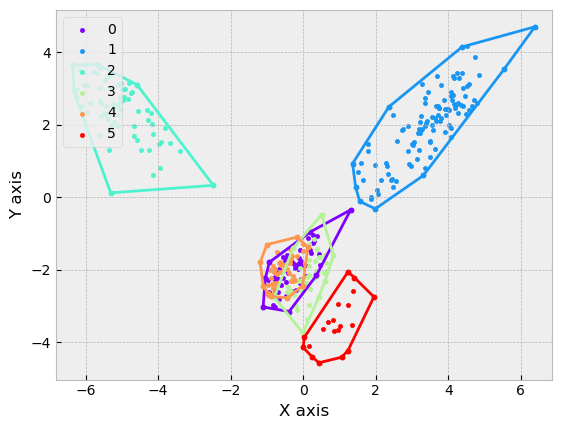

In [9]:
df = pd.read_csv("datasets/dermatology.prepared.csv")

# Generate numeric target labels
dermatologyTarget = getNumericTargetFromDataframe(df['Class'])

# Drop target column
df.drop(columns=['Class'], inplace=True)

pca = PCA(n_components=2)

pca.fit(df)

dermatology2D = pca.transform(df)

plotConvexHullDatabases(dermatologyTarget, dermatology2D)

### **Passo 2: Criação do modelo (se separável)** 

O dataset aparenta ser separável para a categoria 2, assim o modelo será construído usando essa categoria como base.

O modelo resultante é binário e classifica os pontos em pertence à categoria 0 ou não pertence.

**Nota:** O modelo será criado usando dados de treinamento, que correspondem a 70% dos dados originais, ao passo que os dados de teste correspondem a 30%.

*A cada vez que essa célula é executada, uma nova amostra aleatória de (aproximadamente) 70/30 é realizada.*

Selected hulls do not intersect, generating model...


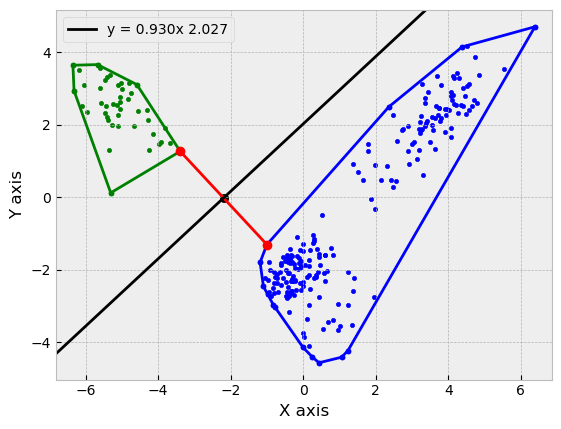

In [10]:
trainingData, trainingDataLabel, testData, testDataLabel = generateTrainingAndTestingData(dermatology2D, dermatologyTarget)

targetToBeSeparated = 2

slope, intercept = generateModelAndPlot(trainingData, trainingDataLabel, targetLabelId=targetToBeSeparated)

### **Passo 3: Execução de testes e coleta de métricas**

A partir do modelo resultante (equação da reta). Os dados de teste são usados para avaliar seu desempenho.

In [11]:
# ALWAYS EXECUTE THE PREVIOUS STEPS FOR THIS DATASET BEFORE EXECUTING THIS CELL

direction = getOrientationConvexHullTargetToModel(trainingData, trainingDataLabel, slope, intercept, targetToBeSeparated)

precision, recall, f1 = runModelAndGetMetrics(testData, testDataLabel, targetToBeSeparated, direction, slope, intercept)

print(f"Precision: {precision:1f} %")
print(f"Recall: {recall:1f} %")
print(f"F1-Score: {f1:1f} %")

True Positive: 26 False Positive: 0 True Negative: 69 False Negative: 0

Precision: 100.000000 %
Recall: 100.000000 %
F1-Score: 100.000000 %


### **Passo 4: Análise dos resultados**

De acordo com os resultados obtidos, percebemos que o modelo criado foi capaz de classificar todos os dados corretamente (na grande maioria das vezes, visto que como os pontos são escolhidos aleatoriamente, em alguma iteração pode ser que os pontos escolhidos formem uma reta que passe por alguma das envoltórias), sem nenhum falso positivo ou falso negativo. Isso ocorreu pois após o PCA, os dados não apresentaram interseção entre a categoria 0 e as demais, sendo possível traçar uma reta que explicasse a separação entre os valores.

---

# Dataset 4: Breast Cancer
*Extraído de https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer*

### **Passo 1: Tratamento de dados** 

Carregar o dataset e realizar a projeção em 2 dimensões

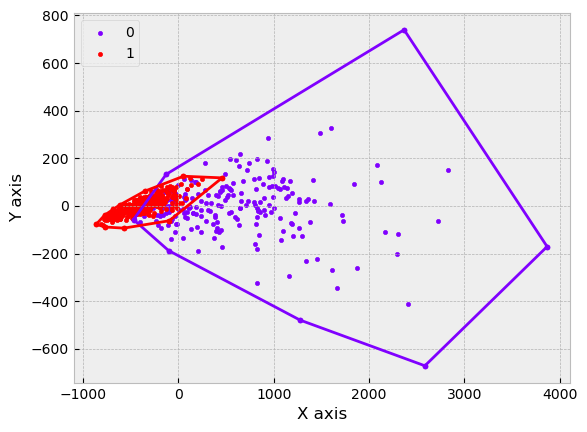

In [12]:
breastCancer = skdataset.load_breast_cancer()
X_breastCancer, breastCancerTarget = breastCancer.data, breastCancer.target

pca = PCA(n_components=2)

pca.fit(X_breastCancer)

breastCancer2D = pca.transform(X_breastCancer)

plotConvexHullDatabases(breastCancer.target, breastCancer2D, scaleEqual=False)

### **Passo 2: Filtragem de dados** 

O dataset aparenta ser QUASE separável para a categoria 0, vamos adaptar o dataset para construir uma reta mesmo assim. Isso será feito da seguinte forma:

- Limpar uma seção horizontal ou vertical de pontos, adicionando-se os pontos removidos aos dados de testes.
- Gerar o modelo com o dataset resultante.
- Executar os testes normalmente, os pontos removidos anteriormente serão testados no modelo.

Assim, será gerado um modelo que QUASE separa todos os dados de forma precisa, mas deve apresentar erros devido aos pontos filtrados nesta etapa.

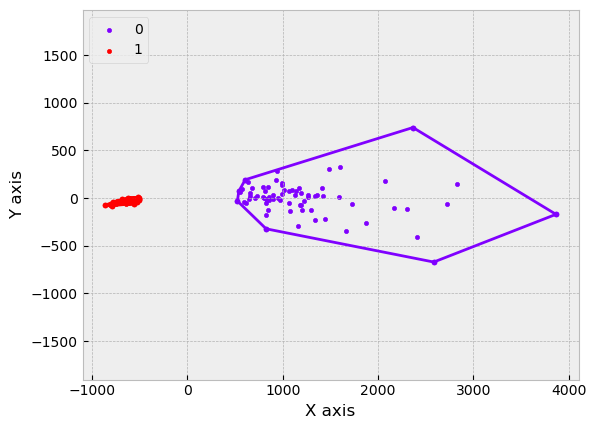

In [13]:
trainingData, trainingDataLabel, testData, testDataLabel = generateTrainingAndTestingDataFiltered(breastCancer2D, breastCancerTarget, X_AXIS, -500, 500)

plotConvexHullDatabases(trainingDataLabel, trainingData)

### **Passo 3: Criação do modelo (se separável)** 

O dataset aparenta ser separável para a categoria 0, assim o modelo será construído usando essa categoria como base.

O modelo resultante é binário e classifica os pontos em pertence à categoria 0 ou não pertence.

**Nota:** O modelo será criado usando dados de treinamento, que correspondem a 70% dos dados originais, ao passo que os dados de teste correspondem a 30%.

Selected hulls do not intersect, generating model...


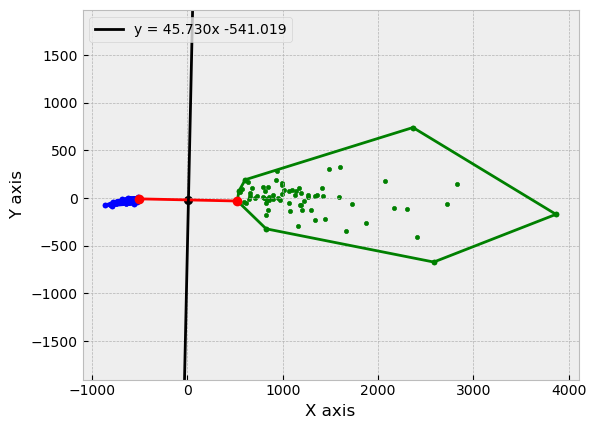

In [14]:
# ALWAYS EXECUTE THE PREVIOUS STEPS FOR THIS DATASET BEFORE EXECUTING THIS CELL

targetToBeSeparated = 0

slope, intercept = generateModelAndPlot(trainingData, trainingDataLabel, targetToBeSeparated)

### **Passo 4: Execução de testes e coleta de métricas**

A partir do modelo resultante (equação da reta). Os dados de teste são usados para avaliar seu desempenho.

In [15]:
# ALWAYS EXECUTE THE PREVIOUS STEPS FOR THIS DATASET BEFORE EXECUTING THIS CELL

direction = getOrientationConvexHullTargetToModel(trainingData, trainingDataLabel, slope, intercept, targetToBeSeparated)

precision, recall, f1 = runModelAndGetMetrics(testData, testDataLabel, targetToBeSeparated, direction, slope, intercept)

print(f"Precision: {precision:1f} %")
print(f"Recall: {recall:1f} %")
print(f"F1-Score: {f1:1f} %")

True Positive: 95 False Positive: 10 True Negative: 279 False Negative: 42

Precision: 90.476190 %
Recall: 69.343066 %
F1-Score: 78.512397 %


### **Passo 5: Análise dos resultados**

Como os dados não eram separáveis após o PCA, forçamos a separação removendo alguns dados que se interceptavam e os adicionando aos dados de teste. Por conta disso, a reta gerada no modelo não conseguiu classificar bem todos os dados, errando justamente nos pontos que estavam na interseção. Por isso ocorrem valores de falso positivo e falso negativo. Dessa forma, os valores de precisão e recall são impactados, o que abaixa o resultado também do f1-score. 

Em específico, como a interseção ocorreu com vários pontos do lado direito da reta, o modelo obteve vários falsos negativos, impactando com mais intensidade a métrica de recall.


---

# Dataset 5: Penguins
*Extraído de https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv*

### **Passo 1: Tratamento de dados** 

Carregar o dataset e realizar a projeção em 2 dimensões

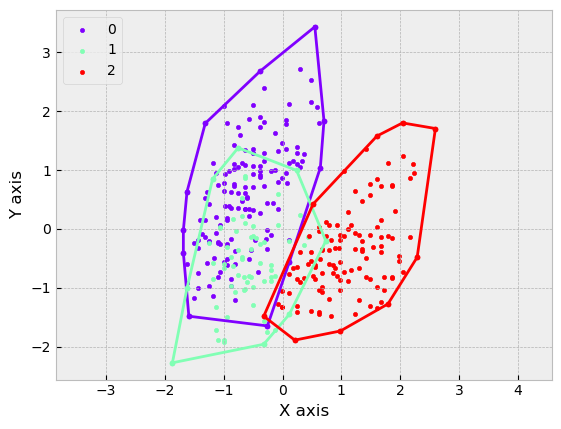

In [16]:
df = pd.read_csv("datasets/penguins.csv")
df.dropna(inplace=True)

# Generate numeric target labels
penguinsTarget = getNumericTargetFromDataframe(df['species'])

# Drop target column
df.drop(columns=['species', 'island', 'sex'], inplace=True)

pca = PCA(n_components=2, whiten=True)

pca.fit(df)

penguins2D = pca.transform(df)

plotConvexHullDatabases(penguinsTarget, penguins2D)

### **Passo 2: Filtragem de dados** 

O dataset aparenta ser QUASE separável para a categoria 2, vamos adaptar o dataset para construir uma reta mesmo assim. Isso será feito da seguinte forma:

- Limpar uma seção horizontal ou vertical de pontos, adicionando-se os pontos removidos aos dados de testes.
- Gerar o modelo com o dataset resultante.
- Executar os testes normalmente, os pontos removidos anteriormente serão testados no modelo.

Assim, será gerado um modelo que QUASE separa todos os dados de forma precisa, mas deve apresentar erros devido aos pontos filtrados nesta etapa.

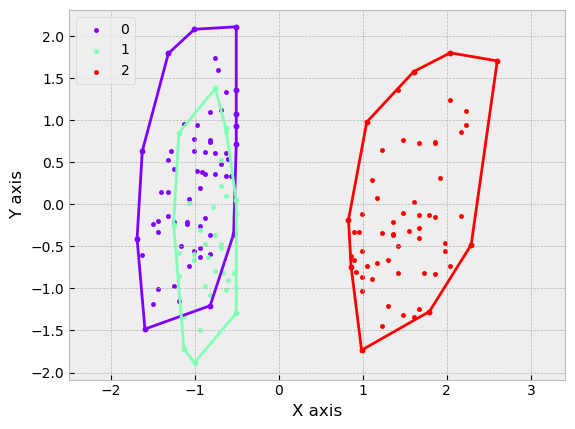

In [17]:
trainingData, trainingDataLabel, testData, testDataLabel = generateTrainingAndTestingDataFiltered(penguins2D, penguinsTarget, X_AXIS, -0.5, 0.8)

plotConvexHullDatabases(trainingDataLabel, trainingData)

### **Passo 3: Criação do modelo (se separável)** 

O dataset aparenta ser separável para a categoria 0, assim o modelo será construído usando essa categoria como base.

O modelo resultante é binário e classifica os pontos em pertence à categoria 0 ou não pertence.

**Nota:** O modelo será criado usando dados de treinamento, que correspondem a 70% dos dados originais, ao passo que os dados de teste correspondem a 30%.

Selected hulls do not intersect, generating model...


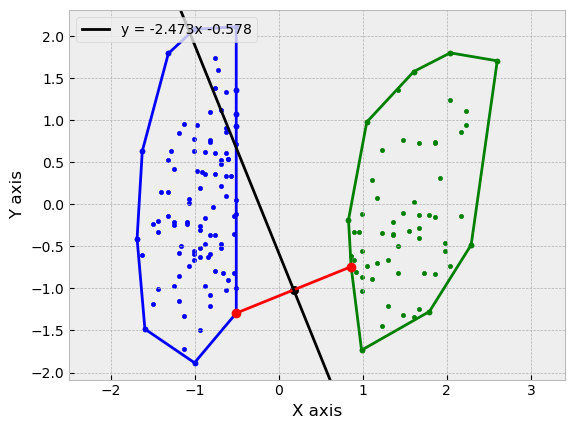

In [18]:
# ALWAYS EXECUTE THE PREVIOUS STEPS FOR THIS DATASET BEFORE EXECUTING THIS CELL

targetToBeSeparated = 2

slope, intercept = generateModelAndPlot(trainingData, trainingDataLabel, targetToBeSeparated)

### **Passo 4: Execução de testes e coleta de métricas**

A partir do modelo resultante (equação da reta). Os dados de teste são usados para avaliar seu desempenho.

In [19]:
# ALWAYS EXECUTE THE PREVIOUS STEPS FOR THIS DATASET BEFORE EXECUTING THIS CELL

direction = getOrientationConvexHullTargetToModel(trainingData, trainingDataLabel, slope, intercept, targetToBeSeparated)

precision, recall, f1 = runModelAndGetMetrics(testData, testDataLabel, targetToBeSeparated, direction, slope, intercept)

print(f"Precision: {precision:1f} %")
print(f"Recall: {recall:1f} %")
print(f"F1-Score: {f1:1f} %")

True Positive: 50 False Positive: 59 True Negative: 56 False Negative: 9

Precision: 45.871560 %
Recall: 84.745763 %
F1-Score: 59.523810 %


### **Passo 5: Análise dos resultados**

Como os dados não eram separáveis após o PCA, forçamos a separação removendo alguns dados que se interceptavam e os adicionando aos dados de teste. Por conta disso, a reta gerada no modelo não conseguiu classificar bem todos os dados, errando justamente nos pontos que estavam na interseção. Por isso ocorrem valores de falso positivo e falso negativo. Dessa forma, os valores de precisão e recall são impactados, o que abaixa o resultado também do f1-score. 

Em específico, como a interseção ocorreu com vários pontos do lado direito da reta, o modelo obteve vários falsos positivos, impactando com mais intensidade a métrica de precisão.


---

# Dataset 6: Magic
*Extraído de https://github.com/Mereep/keel_csv/blob/master/standard_classification/onehot/magic.prepared.csv*

### **Passo 1: Tratamento de dados** 

Carregar o dataset e realizar a projeção em 2 dimensões

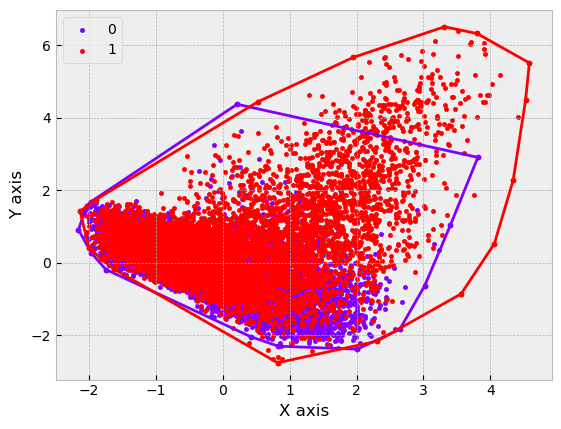

In [20]:
df = pd.read_csv("datasets/magic.prepared.csv")
df.dropna(inplace=True)

# Generate numeric target labels
magicTarget = getNumericTargetFromDataframe(df['Class'])

# Drop target column and non-numeric ones
df.drop(columns=['Class'], inplace=True)

pca = PCA(n_components=2, whiten=True)

pca.fit(df)

magic2D = pca.transform(df)

plotConvexHullDatabases(magicTarget, magic2D, scaleEqual=False)

### **Passo 2: Criação do modelo (se separável)** 

O dataset apresenta uma grande interseção de dados, sendo praticamente impossível separar os dados pelas categorias dessa forma.

**Nota:** O modelo será criado usando dados de treinamento, que correspondem a 70% dos dados originais, ao passo que os dados de teste correspondem a 30%.

*A cada vez que essa célula é executada, uma nova amostra aleatória de (aproximadamente) 70/30 é realizada.*

Dessa forma, ao gerar os dados de treino e de teste, ao plotar os valores e gerar o modelo, confirmamos não temos como separar os dados. Tal fato é exemplificado com as chamadas para geração do modelo para ambas as categorias, sendo impresso que ocorre interseção em ambos os casos.

In [21]:
trainingData, trainingDataLabel, testData, testDataLabel = generateTrainingAndTestingData(magic2D, magicTarget)

generateModelAndPlot(trainingData, trainingDataLabel, 0)
generateModelAndPlot(trainingData, trainingDataLabel, 1)

Selected hulls intersect for target ID 0. Unable to generate model due to data being inseparable
Selected hulls intersect for target ID 1. Unable to generate model due to data being inseparable


### **Passo 5: Análise dos resultados**

Como os dados estavam praticamente juntos após o PCA, não foi possível criar o modelo, nem mesmo retirando os pontos que estavam na interseção, já que compreendem a maior parte dos pontos do dataset.

---

# Dataset 7: Segment
*Extraído de https://github.com/Mereep/keel_csv/blob/master/standard_classification/onehot/segment.prepared.csv*

### **Passo 1: Tratamento de dados** 

Carregar o dataset e realizar a projeção em 2 dimensões

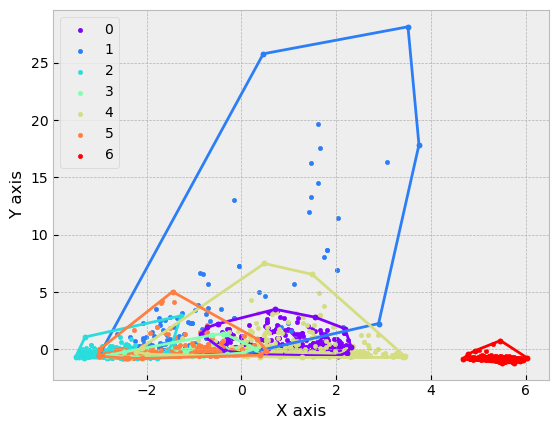

In [22]:
df = pd.read_csv("datasets/segment.prepared.csv")

# Generate numeric target labels
segmentsTarget = getNumericTargetFromDataframe(df['Class'])

# Drop target column
df.drop(columns=['Class'], inplace=True)

pca = PCA(n_components=2)

pca.fit(df)

segments2D = pca.transform(df)

plotConvexHullDatabases(segmentsTarget, segments2D, scaleEqual=False)

### **Passo 2: Criação do modelo (se separável)** 

O dataset aparenta ser separável para a categoria 6, assim o modelo será construído usando essa categoria como base.

O modelo resultante é binário e classifica os pontos em pertence à categoria 6 ou não pertence.

**Nota:** O modelo será criado usando dados de treinamento, que correspondem a 70% dos dados originais, ao passo que os dados de teste correspondem a 30%.

*A cada vez que essa célula é executada, uma nova amostra aleatória de (aproximadamente) 70/30 é realizada.*

Selected hulls do not intersect, generating model...


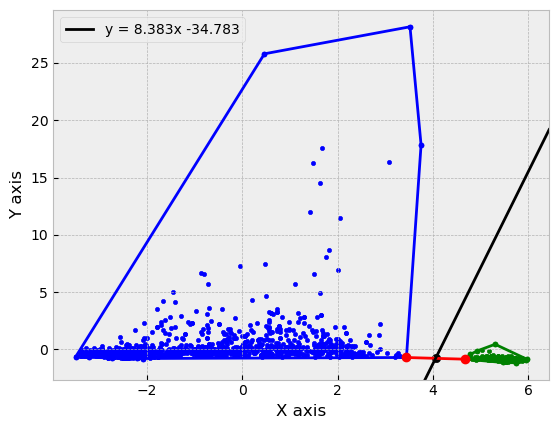

In [23]:
trainingData, trainingDataLabel, testData, testDataLabel = generateTrainingAndTestingData(segments2D, segmentsTarget)

targetToBeSeparated = 6

slope, intercept = generateModelAndPlot(trainingData, trainingDataLabel, targetToBeSeparated, scaleEqual=False)

### A escala não está igual nos dois eixos para o plot acima, a reta pode não aparecer perpendicular devido à isso. Os dados estavam "esticados" no eixo Y e resolvemos desabilitar o uso de scaleEqual para uma melhor visualização dos dados.

### **Passo 3: Execução de testes e coleta de métricas**

A partir do modelo resultante (equação da reta). Os dados de teste são usados para avaliar seu desempenho.

In [24]:
# ALWAYS EXECUTE THE PREVIOUS STEPS FOR THIS DATASET BEFORE EXECUTING THIS CELL

direction = getOrientationConvexHullTargetToModel(trainingData, trainingDataLabel, slope, intercept, targetToBeSeparated)

precision, recall, f1 = runModelAndGetMetrics(testData, testDataLabel, targetToBeSeparated, direction, slope, intercept)

print(f"Precision: {precision:1f} %")
print(f"Recall: {recall:1f} %")
print(f"F1-Score: {f1:1f} %")

True Positive: 100 False Positive: 0 True Negative: 611 False Negative: 0

Precision: 100.000000 %
Recall: 100.000000 %
F1-Score: 100.000000 %


### **Passo 4: Análise dos resultados**

De acordo com os resultados obtidos, percebemos que o modelo criado foi capaz de classificar todos os dados corretamente, sem nenhum falso positivo ou falso negativo. Isso ocorreu pois após o PCA, os dados não apresentaram interseccção entre a categoria 0 e as demais, sendo possível traçar uma reta que explicasse a separação entre os valores.

---

# Dataset 8: Two Norm
*Extraído de https://github.com/Mereep/keel_csv/blob/master/standard_classification/onehot/twonorm.prepared.csv*

### **Passo 1: Tratamento de dados** 

Carregar o dataset e realizar a projeção em 2 dimensões

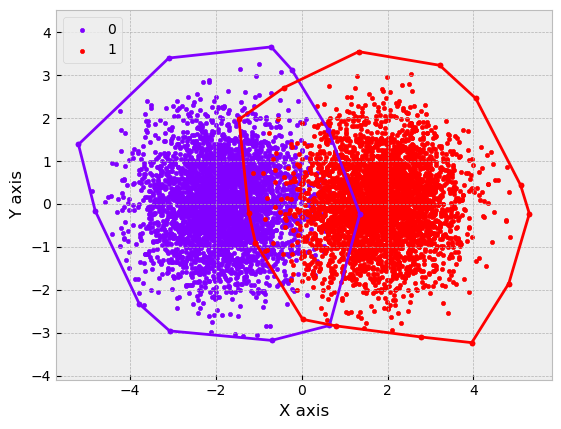

In [25]:
df = pd.read_csv("datasets/twonorm.prepared.csv")

# Generate numeric target labels
twonormTarget = getNumericTargetFromDataframe(df['Class'])

# Drop target column
df.drop(columns=['Class'], inplace=True)

pca = PCA(n_components=2)

pca.fit(df)

twonorm2D = pca.transform(df)

plotConvexHullDatabases(twonormTarget, twonorm2D)

### **Passo 2: Filtragem de dados** 

O dataset aparenta ser QUASE separável para a categoria 0, vamos adaptar o dataset para construir uma reta mesmo assim. Isso será feito da seguinte forma:

- Limpar uma seção horizontal ou vertical de pontos, adicionando-se os pontos removidos aos dados de testes.
- Gerar o modelo com o dataset resultante.
- Executar os testes normalmente, os pontos removidos anteriormente serão testados no modelo.

Assim, será gerado um modelo que QUASE separa todos os dados de forma precisa, mas deve apresentar erros devido aos pontos filtrados nesta etapa.

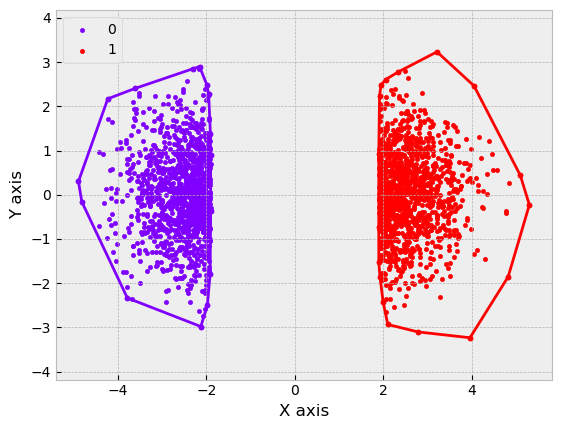

In [26]:
trainingData, trainingDataLabel, testData, testDataLabel = generateTrainingAndTestingDataFiltered(twonorm2D, twonormTarget, X_AXIS, -1.9, 1.9)

plotConvexHullDatabases(trainingDataLabel, trainingData)

### **Passo 3: Criação do modelo (se separável)** 

O dataset aparenta ser separável para a categoria 0, assim o modelo será construído usando essa categoria como base.

O modelo resultante é binário e classifica os pontos em pertence à categoria 0 ou não pertence.

**Nota:** O modelo será criado usando dados de treinamento, que correspondem a 70% dos dados originais, ao passo que os dados de teste correspondem a 30%.

Selected hulls do not intersect, generating model...


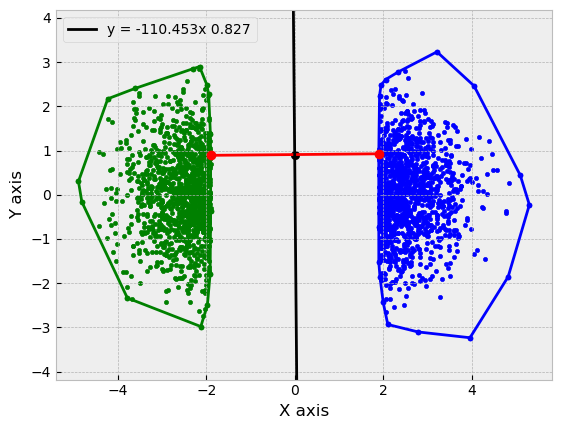

In [27]:
# ALWAYS EXECUTE THE PREVIOUS STEPS FOR THIS DATASET BEFORE EXECUTING THIS CELL

targetToBeSeparated = 0

slope, intercept = generateModelAndPlot(trainingData, trainingDataLabel, targetToBeSeparated)

### **Passo 4: Execução de testes e coleta de métricas**

A partir do modelo resultante (equação da reta). Os dados de teste são usados para avaliar seu desempenho.

In [28]:
# ALWAYS EXECUTE THE PREVIOUS STEPS FOR THIS DATASET BEFORE EXECUTING THIS CELL

direction = getOrientationConvexHullTargetToModel(trainingData, trainingDataLabel, slope, intercept, targetToBeSeparated)

precision, recall, f1 = runModelAndGetMetrics(testData, testDataLabel, targetToBeSeparated, direction, slope, intercept)

print(f"Precision: {precision:1f} %")
print(f"Recall: {recall:1f} %")
print(f"F1-Score: {f1:1f} %")

True Positive: 2411 False Positive: 77 True Negative: 2395 False Negative: 85

Precision: 96.905145 %
Recall: 96.594551 %
F1-Score: 96.749599 %


### **Passo 5: Análise dos resultados**

Como os dados não eram separáveis após o PCA, forçamos a separação removendo alguns dados que se interceptavam e os adicionando aos dados de teste. Por conta disso, a reta gerada no modelo não conseguiu classificar bem todos os dados, errando justamente nos pontos que estavam na interseção. Por isso ocorrem valores de falso positivo e falso negativo. Dessa forma, os valores de precisão e recall são impactados, o que abaixa o resultado também do f1-score. 

Como possível ver nos resultados da célula acima, mesmo que ocorreram falsos positivos e negativos por conta dos pontos da interseção, como esse dataset contêm uma grande quantidade de pontos que estavam bem separados (do lado direito e do lado esquerdo), a reta conseguiu classificar corretamente a grande maioria dos pontos, o que fez que mesmo com os valores classificados errado, as métricas de precisão, recall e f1-score não fossem tão impactadas.

---

# Dataset 9: New Thyroid
*Extraído de https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris*

### **Passo 1: Tratamento de dados** 

Carregar o dataset e realizar a projeção em 2 dimensões

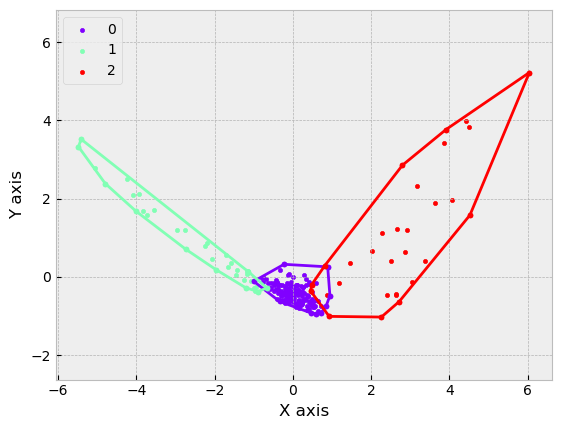

In [29]:
df = pd.read_csv("datasets/newthyroid.prepared.csv")

# Generate numeric target labels
newthyroidTarget = getNumericTargetFromDataframe(df['Class'])

# Drop target column
df.drop(columns=['Class'], inplace=True)

pca = PCA(n_components=2)

pca.fit(df)

newthyroid2D = pca.transform(df)

plotConvexHullDatabases(newthyroidTarget, newthyroid2D)

### **Passo 2: Filtragem de dados** 

O dataset aparenta ser QUASE separável para a categoria 1, vamos adaptar o dataset para construir uma reta mesmo assim. Isso será feito da seguinte forma:

- Limpar uma seção horizontal ou vertical de pontos, adicionando-se os pontos removidos aos dados de testes.
- Gerar o modelo com o dataset resultante.
- Executar os testes normalmente, os pontos removidos anteriormente serão testados no modelo.

Assim, será gerado um modelo que QUASE separa todos os dados de forma precisa, mas deve apresentar erros devido aos pontos filtrados nesta etapa.

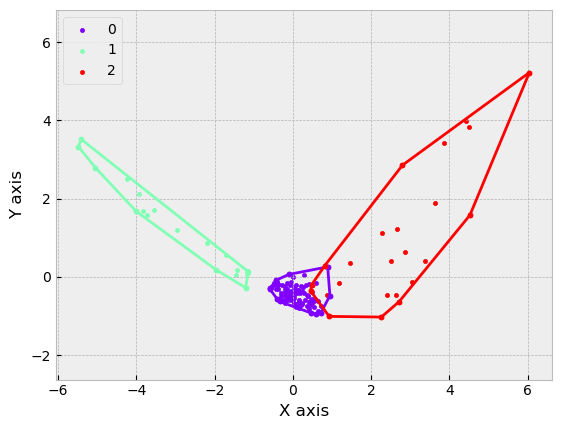

In [30]:
trainingData, trainingDataLabel, testData, testDataLabel = generateTrainingAndTestingDataFiltered(newthyroid2D, newthyroidTarget, X_AXIS, -1.1, -0.6)

plotConvexHullDatabases(trainingDataLabel, trainingData)

### **Passo 3: Criação do modelo (se separável)** 

O dataset aparenta ser separável para a categoria 1, assim o modelo será construído usando essa categoria como base.

O modelo resultante é binário e classifica os pontos em pertence à categoria 1 ou não pertence.

**Nota:** O modelo será criado usando dados de treinamento, que correspondem a 70% dos dados originais, ao passo que os dados de teste correspondem a 30%.

Selected hulls do not intersect, generating model...


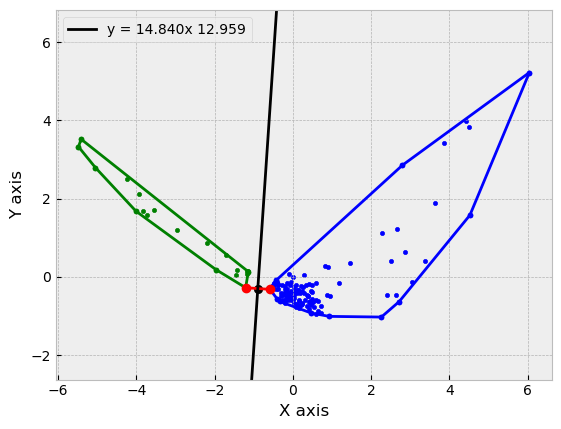

In [31]:
# ALWAYS EXECUTE THE PREVIOUS STEPS FOR THIS DATASET BEFORE EXECUTING THIS CELL

targetToBeSeparated = 1

slope, intercept = generateModelAndPlot(trainingData, trainingDataLabel, targetToBeSeparated)

### **Passo 4: Execução de testes e coleta de métricas**

A partir do modelo resultante (equação da reta). Os dados de teste são usados para avaliar seu desempenho.

In [32]:
# ALWAYS EXECUTE THE PREVIOUS STEPS FOR THIS DATASET BEFORE EXECUTING THIS CELL

direction = getOrientationConvexHullTargetToModel(trainingData, trainingDataLabel, slope, intercept, targetToBeSeparated)

precision, recall, f1 = runModelAndGetMetrics(testData, testDataLabel, targetToBeSeparated, direction, slope, intercept)

print(f"Precision: {precision:1f} %")
print(f"Recall: {recall:1f} %")
print(f"F1-Score: {f1:1f} %")

True Positive: 13 False Positive: 1 True Negative: 53 False Negative: 2

Precision: 92.857143 %
Recall: 86.666667 %
F1-Score: 89.655172 %


### **Passo 5: Análise dos resultados**

Como os dados não eram separáveis após o PCA, forçamos a separação removendo alguns dados que se interceptavam e os adicionando aos dados de teste. Por conta disso, a reta gerada no modelo não conseguiu classificar bem todos os dados, errando justamente nos pontos que estavam na interseção. Por isso ocorrem valores de falso positivo e falso negativo. Dessa forma, os valores de precisão e recall são impactados, o que abaixa o resultado também do f1-score. 

Em específico, como a interseção ocorreu com vários pontos ao centro esquerda da reta (que visulamente contem a maior parte dos dados), ocorreram no geral poucos erros falsos positivos, porém tivemos mais falsos negativos, impactando com mais intensidade a métrica de recall.

---

# Dataset 10: Ecoli
*Extraído de https://github.com/Mereep/keel_csv/blob/master/standard_classification/onehot/ecoli.prepared.csv*

### **Passo 1: Tratamento de dados** 

Carregar o dataset e realizar a projeção em 2 dimensões

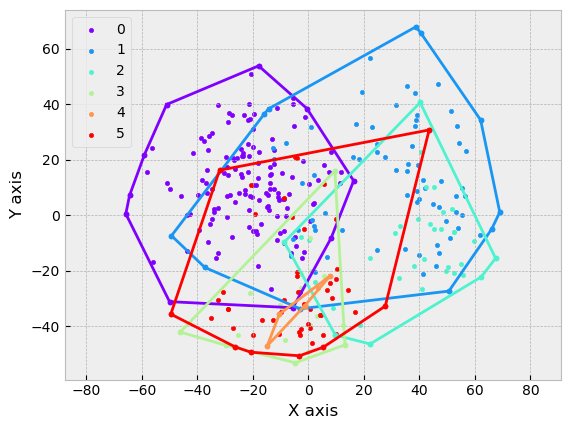

In [33]:
df = pd.read_csv("datasets/ecoli.csv")

# Generate numeric target labels from Site column
ecoliTarget = getNumericTargetFromDataframe(df['Site'])

# Drop non-numeric
df.drop(columns=['Site'], inplace=True)

pca = PCA(n_components=2)

pca.fit(df)

ecoli2D = pca.transform(df)

plotConvexHullDatabases(ecoliTarget, ecoli2D)

### **Passo 2: Criação do modelo (se separável)** 

O dataset apresenta uma grande interseção de dados, sendo praticamente impossível separar os dados pelas categorias dessa forma.

Dessa forma, ao gerar os dados de treino e de teste, ao plotar os valores e gerar o modelo, confirmamos não temos como separar os dados. Tal fato é exemplificado com as chamadas para geração do modelo para ambas as categorias, sendo impresso que ocorre interseção em ambos os casos. Especificamente na classe 4, é informado que ela está dentro de outra envoltória, o que é verificado ao olhar o plot e perceber que essa envoltória é a menor e praticamente está no centro de todas as outras.

In [34]:
generateModelAndPlot(ecoli2D, ecoliTarget, 0)
generateModelAndPlot(ecoli2D, ecoliTarget, 1)
generateModelAndPlot(ecoli2D, ecoliTarget, 2)
generateModelAndPlot(ecoli2D, ecoliTarget, 3)
generateModelAndPlot(ecoli2D, ecoliTarget, 4)
generateModelAndPlot(ecoli2D, ecoliTarget, 5)

Selected hulls intersect for target ID 0. Unable to generate model due to data being inseparable
Selected hulls intersect for target ID 1. Unable to generate model due to data being inseparable
Selected hulls intersect for target ID 2. Unable to generate model due to data being inseparable
Selected hulls intersect for target ID 3. Unable to generate model due to data being inseparable
At least one hull is inside another for target ID 4. Unable to generate model due to data being inseparable
Selected hulls intersect for target ID 5. Unable to generate model due to data being inseparable


### **Passo 3: Análise dos resultados**

Como os dados estavam praticamente juntos após o PCA, não foi possível criar o modelo, nem mesmo retirando os pontos que estavam na interseção, já que compreendem a maior parte dos pontos do dataset.